In [1]:
!pip install transformers

     |████████████████████████████████| 573kB 4.7MB/s 
     |████████████████████████████████| 890kB 12.7MB/s 
     |████████████████████████████████| 3.7MB 20.5MB/s 
     |████████████████████████████████| 1.0MB 43.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=f7f5a6a592ae79d63db67432bf0315006da35d76b891189d062dc442eeb7c0d5
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
%cd /content/gdrive/My\ Drive/630final

/content/gdrive/My Drive/630final


In [4]:
import pandas as pd

train_df = pd.read_csv('./data/train.csv')
val_df = pd.read_csv('./data/dev.csv')
test_df = pd.read_csv('./data/test.csv')

val_df


,id,original,edit,grades,meanGrade
0,1723,Thousands of gay and bisexual <men/> convicted...,swans,22100,1.0
1,12736,Special <prosecutor/> appointed to Trump Russia,chef,21100,0.8
2,12274,Spanish police detain man and search Ripoll ad...,squad,21000,0.6
3,8823,N.Y. Times <reprimands/> reporter for sharing ...,applauds,32210,1.6
4,5087,Vladimir Putin Releases Video Simulation Of Ru...,balloon,11000,0.4
...,...,...,...,...,...
2414,1202,Supreme <Court/> Once Again Strikes Down Racia...,leaders,10000,0.2
2415,14764,Trump Mocks Schumer ’s Tears ; Vows to ‘ Make ...,Insane,33333,3.0
2416,12595,US government memo on the <danger/> of leaking...,amusement,22111,1.4
2417,70,Newt Gingrich : Join Me in Supporting Judge Ro...,Molest,32110,1.4


In [5]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
%matplotlib inline
sns.set() 
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
np.append(train_df['meanGrade'],val_df['meanGrade'])

array([0.2, 1.6, 1. , ..., 1.4, 1.4, 0.6])

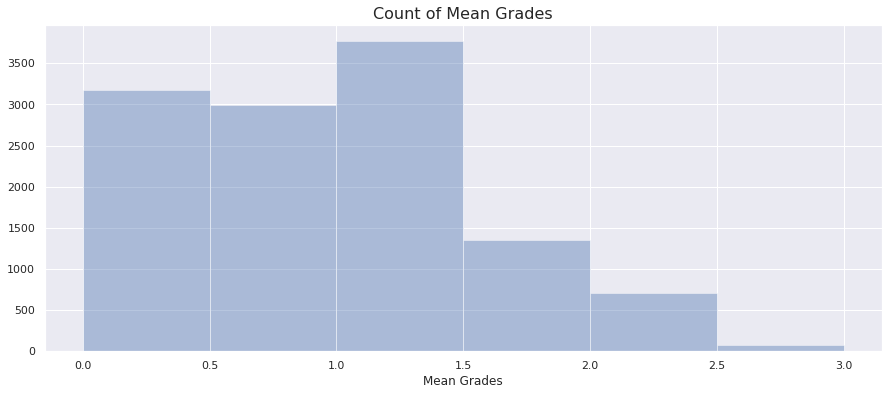

In [7]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Count of Mean Grades", fontsize=16)
ax.set_xlabel("Mean Grades")
sns.distplot(np.append(train_df['meanGrade'],val_df['meanGrade']),bins=6,ax=ax,kde=False);

In [0]:
train_df['text'] = train_df.apply(lambda x:x['original'].replace(x['original'][x['original'].find('<'):x['original'].find('>')+1],x['edit']) ,axis=1)
val_df['text'] = val_df.apply(lambda x:x['original'].replace(x['original'][x['original'].find('<'):x['original'].find('>')+1],x['edit']) ,axis=1)
test_df['text'] = test_df.apply(lambda x:x['original'].replace(x['original'][x['original'].find('<'):x['original'].find('>')+1],x['edit']) ,axis=1)

In [9]:
train_df['old'] = train_df.apply(lambda x:x['original'][x['original'].find('<')+1:x['original'].find('>')-1],axis=1)
val_df['old'] = val_df.apply(lambda x:x['original'][x['original'].find('<')+1:x['original'].find('>')-1],axis=1)
test_df['old'] = test_df.apply(lambda x:x['original'][x['original'].find('<')+1:x['original'].find('>')-1],axis=1)

train_df['text2'] = train_df.apply(lambda x:x['text'] + ' [SEP] From '+x['old'] + ' to '+x['edit'] ,axis=1)
val_df['text2'] = val_df.apply(lambda x:x['text'] + ' [SEP] From '+x['old'] + ' to '+x['edit'] ,axis=1)
test_df['text2'] = test_df.apply(lambda x:x['text'] + ' [SEP] From '+x['old'] + ' to '+x['edit'] ,axis=1)

test_df['text2'][0]

'The Latest : Election tally shows Cars turning right [SEP] From Austria to Cars'

In [10]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [0]:
import numpy as np

In [12]:
# Get the lists of sentences and their labels.
sentences = train_df['text2'].values
labels = train_df['meanGrade'].values
labels[:10]

array([0.2, 1.6, 1. , 0.4, 0. , 1.2, 1.2, 1. , 0.2, 0. ])

In [13]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased",do_lower_case=True)

Loading BERT tokenizer...


In [14]:
labels[:10]
sentences

array(['France is ‘ hunting down its citizens who joined twins ’ without trial in Iraq [SEP] From Isis to twins',
       'Pentagon claims 2,000 % increase in Russian trolls after bowling strikes . What does that mean ? [SEP] From Syria to bowling',
       'Iceland PM Calls Snap Vote as Pedophile Furor Crashes party  [SEP] From Coalition to party',
       ...,
       "Cruise line Carnival Corp. joins the fight against Bermuda 's same-sex raisin ban [SEP] From marriage to raisin",
       'Columbia police hunt woman seen with cake near University of Missouri campus [SEP] From gun to cake',
       "Here 's What 's In The House-Approved Health food Bill [SEP] From Care to food"],
      dtype=object)

In [15]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 32,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  France is ‘ hunting down its citizens who joined twins ’ without trial in Iraq [SEP] From Isis to twins
Token IDs: tensor([  101,  2605,  2003,  1520,  5933,  2091,  2049,  4480,  2040,  2587,
         8178,  1521,  2302,  3979,  1999,  5712,   102,  2013, 18301,  2000,
         8178,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])


In [16]:
test_df.head(10)
val_df.head(10)

,id,original,edit,grades,meanGrade,text,old,text2
0,1723,Thousands of gay and bisexual <men/> convicted...,swans,22100,1.0,Thousands of gay and bisexual swans convicted ...,men,Thousands of gay and bisexual swans convicted ...
1,12736,Special <prosecutor/> appointed to Trump Russia,chef,21100,0.8,Special chef appointed to Trump Russia,prosecutor,Special chef appointed to Trump Russia [SEP] F...
2,12274,Spanish police detain man and search Ripoll ad...,squad,21000,0.6,Spanish police detain man and search Ripoll ad...,suspects,Spanish police detain man and search Ripoll ad...
3,8823,N.Y. Times <reprimands/> reporter for sharing ...,applauds,32210,1.6,N.Y. Times applauds reporter for sharing ' unf...,reprimands,N.Y. Times applauds reporter for sharing ' unf...
4,5087,Vladimir Putin Releases Video Simulation Of Ru...,balloon,11000,0.4,Vladimir Putin Releases Video Simulation Of Ru...,Missile,Vladimir Putin Releases Video Simulation Of Ru...
5,13178,"Ex-Goldman Sachs boss , Obama ambassador Murph...",chase,11000,0.4,"Ex-Goldman Sachs boss , Obama ambassador Murph...",replace,"Ex-Goldman Sachs boss , Obama ambassador Murph..."
6,11799,Trump ’s next military <scapegoat/> : Foreign-...,assassinations,21100,0.8,Trump ’s next military assassinations : Foreig...,scapegoat,Trump ’s next military assassinations : Foreig...
7,13425,President Trump ’s Golden Age of <Trolling/>,Skydiving,21100,0.8,President Trump ’s Golden Age of Skydiving,Trolling,President Trump ’s Golden Age of Skydiving [S...
8,12497,"US urges UN to <punish/> Iran , but Russia say...",tickle,21110,1.0,"US urges UN to tickle Iran , but Russia says n...",punish,"US urges UN to tickle Iran , but Russia says n..."
9,1185,Taliban <kill/> 95 with ambulance bomb,bores,11000,0.4,Taliban bores 95 with ambulance bomb,kill,Taliban bores 95 with ambulance bomb [SEP] Fro...


In [0]:
# pre-processing for validation set
sentences_val = val_df['text2'].values
labels_val = val_df['meanGrade'].values


In [18]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids_val = []
attention_masks_val = []

# For every sentence...
for sent in sentences_val:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 32,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)
labels_val = torch.tensor(labels_val)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences_val[0])
print('Token IDs:', input_ids_val[0])

Original:  Thousands of gay and bisexual swans convicted of long-abolished sexual offences are posthumously pardoned [SEP] From men to swans
Token IDs: tensor([  101,  5190,  1997,  5637,  1998, 22437, 26699,  7979,  1997,  2146,
         1011,  8961,  4424, 18421,  2024, 12770, 14933,  2098,   102,  2013,
         2273,  2000, 26699,   102,     0,     0,     0,     0,     0,     0,
            0,     0])


In [0]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(input_ids, attention_masks, labels)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [0]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [21]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 1, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [0]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [0]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [25]:
model = model.double()

import random
from sklearn.metrics import mean_squared_error

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # # ========================================
    # #               Training
    # # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    y_pred = np.array([])
    y_true = np.array([])

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
 
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        y_pred = np.append(y_pred,logits)
        y_true = np.append(y_true,label_ids)
        

    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print("  RMSE: {0:.4f}".format(rmse))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. RMSE.': rmse,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )


print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    302.    Elapsed: 0:00:11.
  Batch    80  of    302.    Elapsed: 0:00:21.
  Batch   120  of    302.    Elapsed: 0:00:32.
  Batch   160  of    302.    Elapsed: 0:00:42.
  Batch   200  of    302.    Elapsed: 0:00:53.
  Batch   240  of    302.    Elapsed: 0:01:03.
  Batch   280  of    302.    Elapsed: 0:01:14.

  Average training loss: 0.33
  Training epcoh took: 0:01:19

Running Validation...
  RMSE: 0.5302
  Validation Loss: 0.28
  Validation took: 0:00:04

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    302.    Elapsed: 0:00:10.
  Batch    80  of    302.    Elapsed: 0:00:21.
  Batch   120  of    302.    Elapsed: 0:00:31.
  Batch   160  of    302.    Elapsed: 0:00:42.
  Batch   200  of    302.    Elapsed: 0:00:52.
  Batch   240  of    302.    Elapsed: 0:01:03.
  Batch   280  of    302.    Elapsed: 0:01:13.

  Average training loss: 0.24
  Training epcoh took: 0:01:19

Running Validation...
  RMSE: 0.5419
  Val